In [64]:
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(array,label,bin_num=100,normed=True,set_bin_size=True,bin_size=.4):
    """Histogram plotter made by me, versatile"""
    if set_bin_size == True:
        bin_num = float(np.max(array)-np.min(array))/bin_size
        n, bins = np.histogram(array,bins=int(bin_num),normed=normed)
    else:
        n, bins = np.histogram(array,bins=bin_num,normed=normed)
    
    plt.plot(bins[1:],n,label=label)
    return 

def plot_number_density(file_name,label):
    hdulist = fits.open(file_name)
    tbdata = hdulist[1].data
    distance_mins = tbdata['Separation']
    plot_hist(distance_mins,label)


# load fits table
hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/galex_coords.fits')
tbdata = hdulist[1].data
tbdata

ra_galex = tbdata.field('RA')
dec_galex = tbdata.field('DEC')

print(np.min(ra_galex),np.max(ra_galex),np.min(dec_galex),np.max(dec_galex))

ra_val = np.float32(np.random.random_sample()*360.)
dec_val = np.float32(np.random.random_sample()*180.-90)

ra_val, dec_val

rand_ra = []
rand_dec = []

for _ in range(1000000):
    rand_ra.append(np.float32(np.random.random_sample()*360.))
    rand_dec.append(np.float32(np.random.random_sample()*180.-90))
    
np.min(rand_ra),np.max(rand_ra),np.min(rand_dec),np.max(rand_dec)

tbhdu = fits.BinTableHDU.from_columns(
    [fits.Column(name='RA', format='E', array=rand_ra),
     fits.Column(name='DEC', format='E', array=rand_dec)])

tbhdu.data

tbhdu.writeto('/home/calum/Documents/Mphys_data/match_catalogs/random_coordinates.fits')

rand_ra = []
rand_dec = []

for _ in range(int(1e7)):
    rand_ra.append(np.float32(np.random.random_sample()*360.))
    rand_dec.append(np.float32(np.random.random_sample()*180.-90))
    
np.min(rand_ra),np.max(rand_ra),np.min(rand_dec),np.max(rand_dec)

tbhdu = fits.BinTableHDU.from_columns(
    [fits.Column(name='RA', format='E', array=rand_ra),
     fits.Column(name='DEC', format='E', array=rand_dec)])

tbhdu.data

tbhdu.writeto('/home/calum/Documents/Mphys_data/match_catalogs/more_random_coordinates.fits')

In [65]:
# randomly select a point on sky
# create catalog of these random points
# cross match against surveys using topcat
# consider what the expected contamination is

(0, 0.25)

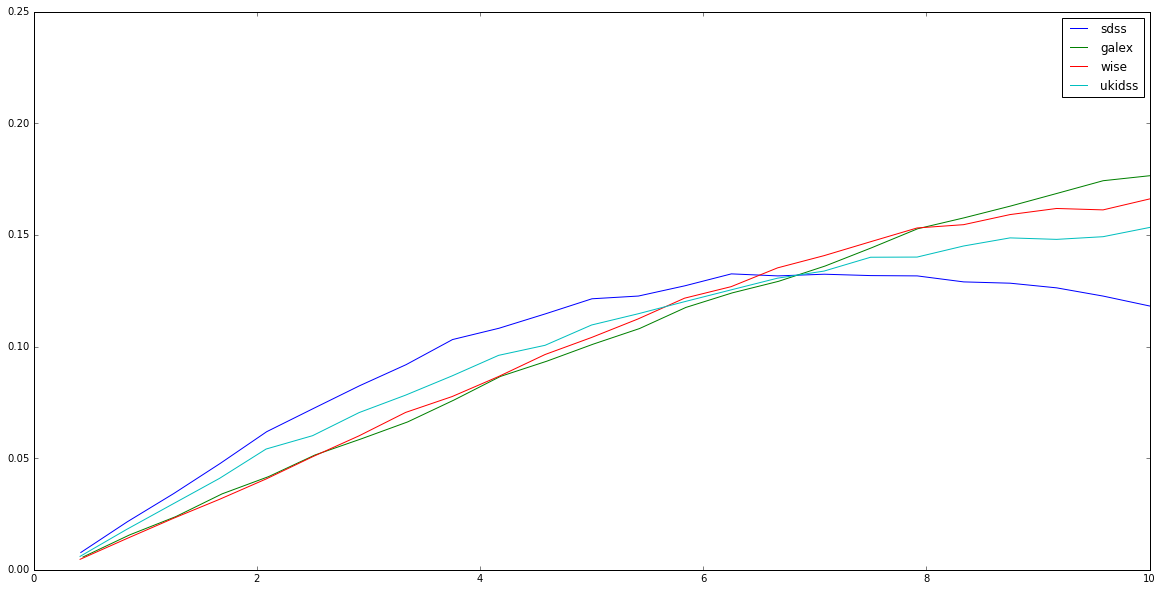

In [71]:
plt.figure(figsize=(20,10))
plot_number_density('/home/calum/Documents/Mphys_data/match_catalogs/xmatch_sdss.fits','sdss')
plot_number_density('/home/calum/Documents/Mphys_data/match_catalogs/checking_galex_xmatch.fits','galex')
plot_number_density('/home/calum/Documents/Mphys_data/match_catalogs/checking_wise_xmatch.fits','wise')
#plot_number_density('/home/calum/Documents/Mphys_data/match_catalogs/checking_ukidss_xmatch.fits','ukidss')
plot_number_density('/home/calum/Documents/Mphys_data/match_catalogs/checking_ukidss_large_xmatch.fits','ukidss')
plt.legend()
plt.ylim(0,0.25)

In [73]:
hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/galex_xmatch_best1.fits')
tbdata = hdulist[1].data
tbdata

hdulist2 = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/galex_xmatch.fits')
tbdata2 = hdulist2[1].data
tbdata2

FITS_rec([ (172.66267, 63.258026, 172.6573, 63.259071, -2147483648, -2147483648, 9.4793183975719764),
       (233.02647, 5.4515772, 233.02713, 5.4526496, -2147483648, -2147483648, 4.5203640689828424),
       (174.7906, 41.509583, 174.78889, 41.509014, -2147483648, -2147483648, 5.0411285970564741),
       ...,
       (314.48773, -57.043484, 314.49127, -57.042286, -2147483648, -2147483648, 8.164579462347298),
       (9.4562597, 7.054316, 9.4555912, 7.0545182, -2147483648, -2147483648, 2.4969109004112298),
       (14.087959, -53.170712, 14.085296, -53.172157, -2147483648, -2147483648, 7.754201480712104)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('GroupID', '>i4'), ('GroupSize', '>i4'), ('Separation', '>f8')]))

In [74]:
wise_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/xmatch_wise.fits')
wise_tbdata = wise_hdulist[1].data
wise_tbdata

FITS_rec([ (43.988968, 41.113174, 43.990391, 41.110714, -2147483648, -2147483648, 9.661975811151132),
       (44.418171, -38.788673, 44.417694, -38.787548, -2147483648, -2147483648, 4.2664570685695695),
       (270.4834, -35.762733, 270.48413, -35.763382, -2147483648, -2147483648, 3.1666968721665527),
       ...,
       (280.22083, 73.975433, 280.21939, 73.972794, -2147483648, -2147483648, 9.6094958074660468),
       (58.419975, -12.627014, 58.421978, -12.626656, -2147483648, -2147483648, 7.1528552916397921),
       (58.625336, -12.293052, 58.627983, -12.292068, -2147483648, -2147483648, 9.9633985707765387)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('GroupID', '>i4'), ('GroupSize', '>i4'), ('Separation', '>f8')]))

In [75]:
ukidss_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/xmatch_ukidss.fits')
ukidss_tbdata = ukidss_hdulist[1].data
ukidss_tbdata

FITS_rec([ (137.6993, 8.6164122, 137.69705, 8.6163206, -2147483648, -2147483648, 7.9906144653397559),
       (197.60738, 0.67908704, 197.60722, 0.67809725, 1, 3, 3.6053481623984203),
       (197.60857, 0.67698061, 197.60722, 0.67809725, 1, 3, 6.2867777945131742),
       ...,
       (198.5681, 3.3380132, 198.56541, 3.3374615, 6761, 3, 9.8538044527471644),
       (201.56232, 3.3438392, 201.56349, 3.3416803, 2706, 6, 8.8449613755307404),
       (201.56306, 3.344142, 201.56349, 3.3416803, 2706, 6, 8.9940556893196852)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('GroupID', '>i4'), ('GroupSize', '>i4'), ('Separation', '>f8')]))

In [76]:
new_galex_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/new_xmatch_galex.fits')
new_galex_tbdata = new_galex_hdulist[1].data
new_galex_tbdata

FITS_rec([(329.83612, -3.5522022, 329.83429, -3.552067, 6.5971075746138093),
       (107.64096, 55.296608, 107.64274, 55.294167, 9.5143609812916754),
       (275.85431, 23.322266, 275.85672, 23.322166, 7.9780413703599091),
       ...,
       (291.68549, -66.660912, 291.69144, -66.659492, 9.9064165158374795),
       (132.81537, 15.510289, 132.81441, 15.509391, 4.6453668566671746),
       (318.92032, -58.345173, 318.91577, -58.343929, 9.6874768042947785)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('Separation', '>f8')]))

In [77]:
sdss_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/xmatch_sdss.fits')
sdss_tbdata = sdss_hdulist[1].data
sdss_tbdata

FITS_rec([(39.127155, -0.17916822, 39.12701, -0.17859176, 2.1398848817585714),
       (329.83612, -3.5522022, 329.83578, -3.5547369, 9.2040361530062533),
       (122.29518, 36.908722, 122.29484, 36.91111, 8.6534178891253486),
       ..., (221.07449, 44.779751, 221.0769, 44.779243, 6.425742515789219),
       (132.81537, 15.510289, 132.81482, 15.508828, 5.5942409572827891),
       (187.07822, 40.951218, 187.08093, 40.950771, 7.5576785709288439)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('Separation', '>f8')]))

In [78]:
reverse_sdss_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/reverse_xmatch_sdss.fits')
reverse_sdss_tbdata = reverse_sdss_hdulist[1].data
reverse_sdss_tbdata

FITS_rec([(338.41495, -0.82327211, 338.41705, -0.82374066, 7.765202454234422),
       (349.47742, -0.89702809, 349.47568, -0.89771217, 6.7283352204978879),
       (352.94107, -0.91711211, 352.93906, -0.91685981, 7.3067236160867548),
       ...,
       (354.04953, 30.735527, 354.04926, 30.73344, 7.5598270797474099),
       (354.01517, 30.758764, 354.01489, 30.760118, 4.9486717476845294),
       (357.94269, 30.986422, 357.94162, 30.986238, 3.3617254924747724)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('Separation', '>f8')]))

In [79]:
repeat_ukidss_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/repeat_xmatch_ukidss.fits')
repeat_ukidss_tbdata = repeat_ukidss_hdulist[1].data
repeat_ukidss_tbdata

FITS_rec([(186.06827, 8.6029673, 186.06944, 8.6050453, 8.5706273041685854),
       (186.31406, 0.69873285, 186.31665, 0.69805992, 9.6468241123045342),
       (193.11786, 8.6375847, 193.11766, 8.6394682, 6.8172807975424599),
       ...,
       (187.91225, 3.4758098, 187.90971, 3.4759629, 9.1185423744863314),
       (196.41203, 3.3114593, 196.41202, 3.3125312, 3.859337401807962),
       (204.95135, 3.4403346, 204.95294, 3.4407425, 5.8886546560233111)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('Separation', '>f8')]))

In [80]:
repeat_wise_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/checking_wise_xmatch.fits')
repeat_wise_tbdata = repeat_wise_hdulist[1].data
repeat_wise_tbdata

FITS_rec([(43.988968, 41.113174, 43.990391, 41.110714, 9.661975811151132),
       (44.418171, -38.788673, 44.417694, -38.787548, 4.2664570685695695),
       (270.4834, -35.762733, 270.48413, -35.763382, 3.1666968721665527),
       ...,
       (280.22083, 73.975433, 280.21939, 73.972794, 9.6094958074660468),
       (58.419975, -12.627014, 58.421978, -12.626656, 7.1528552916397921),
       (58.625336, -12.293052, 58.627983, -12.292068, 9.9633985707765387)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('Separation', '>f8')]))

In [81]:
repeat_galex_hdulist = fits.open('/home/calum/Documents/Mphys_data/match_catalogs/checking_galex_xmatch.fits')
repeat_galex_tbdata = repeat_galex_hdulist[1].data
repeat_galex_tbdata

FITS_rec([(181.44379, 35.558765, 181.44559, 35.559956, 6.7944379387834282),
       (181.44386, 83.426003, 181.43944, 83.427612, 6.0754220149463247),
       (181.45052, 7.552875, 181.45076, 7.5544152, 5.6127007379282956),
       ...,
       (284.17078, -36.21257, 284.17026, -36.210205, 8.6467272033617828),
       (284.17413, 58.607426, 284.17282, 58.606144, 5.2294439915849473),
       (284.17776, -76.470345, 284.17603, -76.469345, 3.8848742346893745)], 
      dtype=(numpy.record, [('RA_1', '>f4'), ('DEC_1', '>f4'), ('RA_2', '>f4'), ('DEC_2', '>f4'), ('Separation', '>f8')]))

In [82]:
distance_mins = tbdata['Separation']
distance_mins2 = tbdata2['Separation']
wise_distance_mins = wise_tbdata['Separation']
ukidss_distance_mins = ukidss_tbdata['Separation']
new_galex_distance_mins = new_galex_tbdata['Separation']
sdss_distance_mins = sdss_tbdata['Separation']
reverse_sdss_distance_mins = reverse_sdss_tbdata['Separation']
repeat_ukidss_distance_mins = repeat_ukidss_tbdata['Separation']
repeat_wise_distance_mins = repeat_wise_tbdata['Separation']
repeat_galex_distance_mins = repeat_galex_tbdata['Separation']

print(len(distance_mins),len(distance_mins2), len(wise_distance_mins), 
      len(ukidss_distance_mins), len(new_galex_distance_mins), len(sdss_distance_mins),
      len(reverse_sdss_distance_mins), len(repeat_ukidss_distance_mins),len(repeat_wise_distance_mins),
      len(repeat_galex_distance_mins))

97398 121009 339393 31900 96946 156473 156473 19277 307196 97398


In [83]:
def plot_hist(array,bin_num,default=False):
    n, bins, patches = plt.hist(array,bins=bin_num,normed=default)
    plt.close()
    return bins, n

def make_graphs(file_str, nbins, default=False):
    array = np.load(file_str)
    print(array.shape)
    # create histogram and convert from arcminutes to arcseconds
    bins, n = plot_hist([row[1]*60. for row in array],nbins,default=default)     
   
    step = 0.5*(bins[1]-bins[0])
    
    return bins[:-1]+step, n

(0, 0.25)

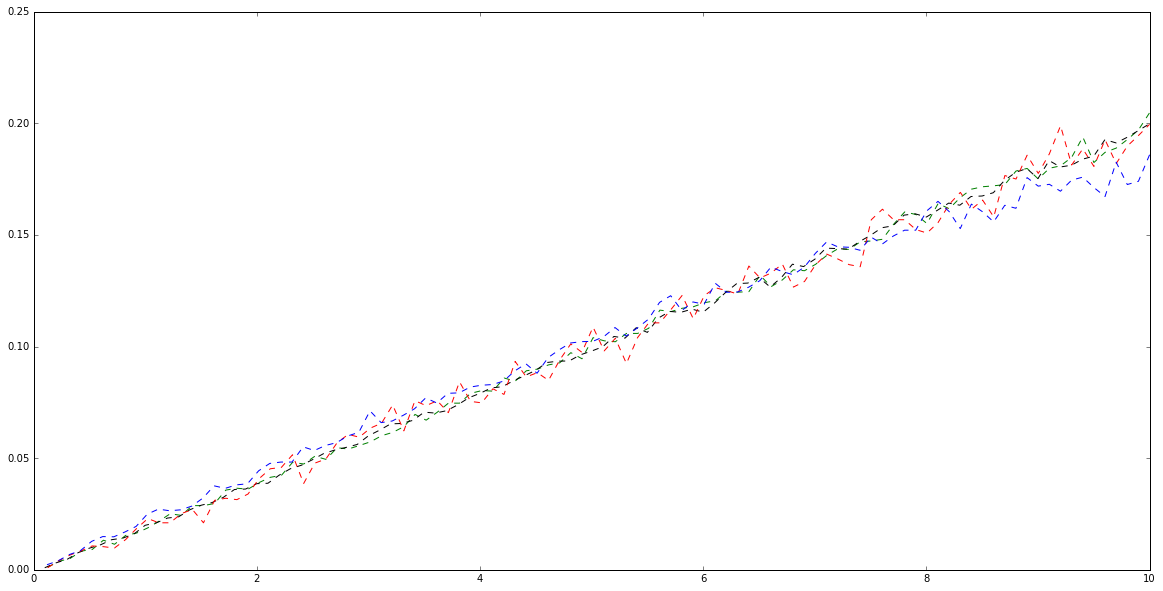

In [85]:
bins, n = plot_hist(distance_mins,100)
bins2, n2 = plot_hist(distance_mins2,100,default=True)
wise_bins , wise_n = plot_hist(wise_distance_mins,100,default=True)
ukidss_bins, ukidss_n = plot_hist(ukidss_distance_mins,100,default=True)
galex_bins, galex_n = plot_hist(new_galex_distance_mins,100,default=True)
sdss_bins, sdss_n = plot_hist(sdss_distance_mins,100,default=True)
rsdss_bins, rsdss_n = plot_hist(reverse_sdss_distance_mins,100,default=True)
rukidss_bins, rukidss_n = plot_hist(repeat_ukidss_distance_mins,100,default=True)
rwise_bins, rwise_n = plot_hist(repeat_wise_distance_mins,100,default=True)
rgalex_bins, rgalex_n = plot_hist(repeat_galex_distance_mins,100,default=True)
plt.figure(figsize=(20,10))
#plt.plot(bins[1:],n)
plt.plot(bins2[1:],n2,'g--')
plt.plot(wise_bins[1:],wise_n,'k--')
plt.plot(ukidss_bins[1:],ukidss_n,'r--')
plt.plot(galex_bins[1:],galex_n,'b--')
#plt.plot(sdss_bins[1:],sdss_n,'b--')
#plt.plot(rsdss_bins[1:],rsdss_n,'bo')
#plt.plot(rukidss_bins[1:],ukidss_n,'r-')
#plt.plot(rwise_bins[1:],rwise_n,'go')
#plt.plot(rgalex_bins[1:],rgalex_n,'yo')
plt.ylim(0,0.25)

In [67]:
gal_bins, gal_n = galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',100)
plt.figure(figsize=(20,10))
plt.plot(gal_bins,gal_n/162796)
plt.plot(bins[1:],n/(6*97398))

(162796, 7)


TypeError: plot_hist() got an unexpected keyword argument 'default'

(162796, 7)
1823.0


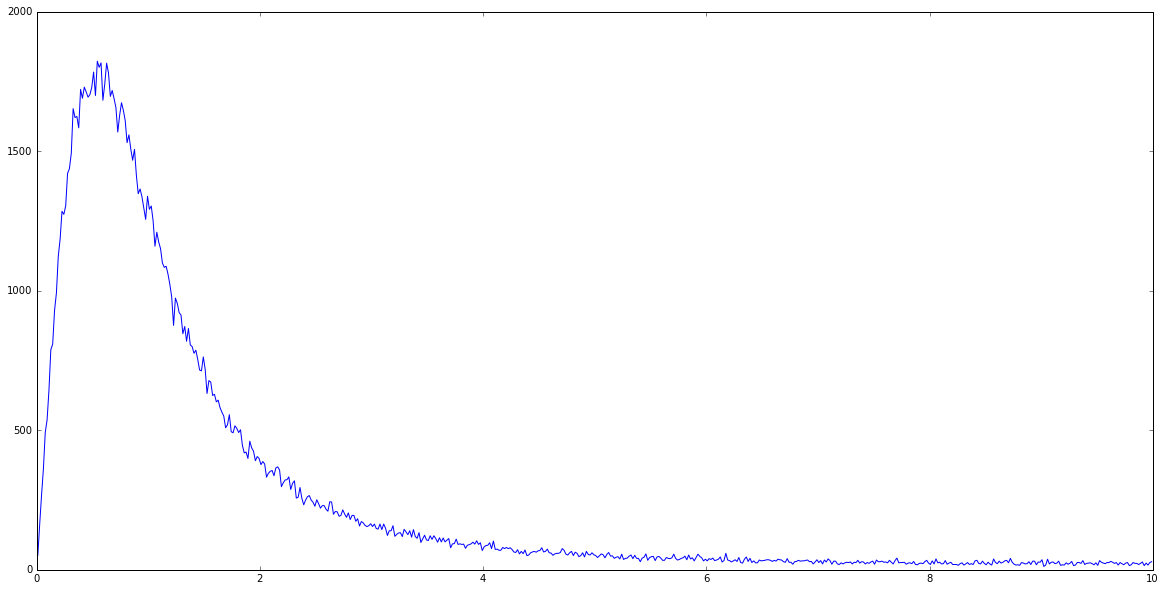

In [34]:
gal_bins, gal_n = galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600)
plt.figure(figsize=(20,10))
plt.plot(gal_bins,gal_n)
print(np.max(gal_n))

(205839, 7)


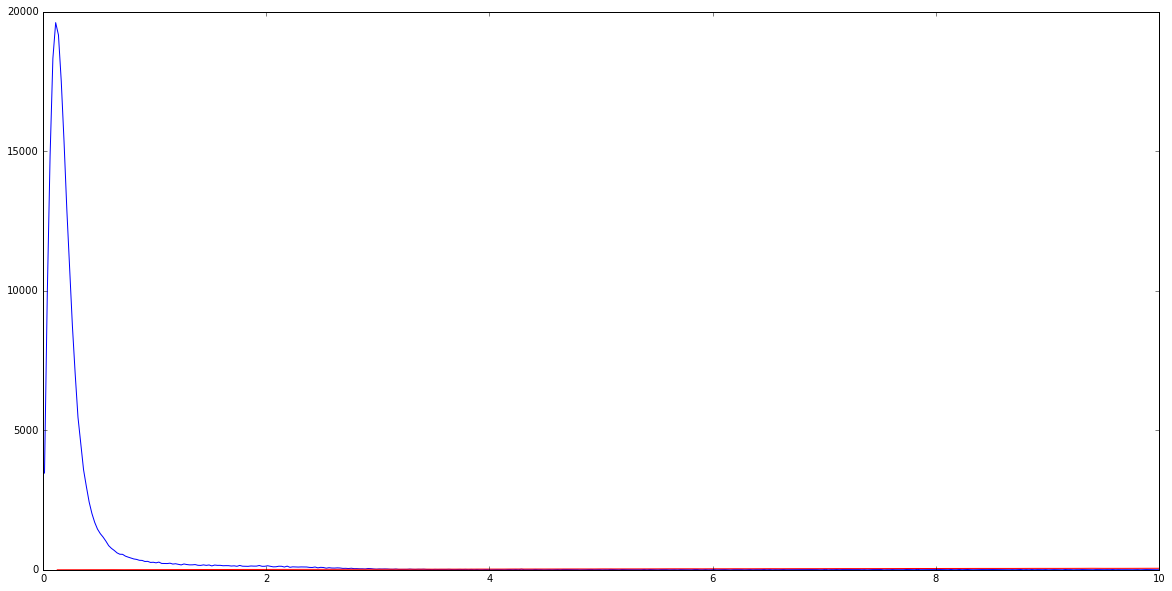

In [27]:
wise_bins, wise_n = galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_wise.npy',600)
plt.figure(figsize=(20,10))
plt.plot(wise_bins,wise_n)
plt.plot(bins[1:],0.1*n)
plt.xlim(0,10)
plt.plot(bins[1:],300*n)

In [29]:
bins[20], wise_bins[80], np.sum(n[:20]*300)/np.sum(wise_n[:80]), np.sum(n*300)/np.sum(wise_n)

(2.0219559109238934,
 2.0121879214954559,
 0.00069899941871743741,
 0.014614760547366415)

In [64]:
bins[25],n[25], gal_bins[150]

(2.5205784335769756, 0.054360318954233766, 2.5093608042740017)

In [63]:
np.sum(200*n[:25]),np.sum(gal_n[:150])

(143.60184257076764, 136745.0)

In [62]:
2.5*600/10


150.0

In [ ]:
np.sum[gal_]